# Data Science Project 2 Analaysis

In [54]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import ttest_rel
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Data Cleaning

In [35]:
# List of file paths and corresponding years
file_paths = ["MERGED1996_97_PP.csv", "MERGED1997_98_PP.csv", "MERGED1998_99_PP.csv", "MERGED1999_00_PP.csv",
              "MERGED2000_01_PP.csv", "MERGED2001_02_PP.csv", "MERGED2002_03_PP.csv", "MERGED2003_04_PP.csv",
              "MERGED2004_05_PP.csv", "MERGED2005_06_PP.csv", "MERGED2006_07_PP.csv", "MERGED2007_08_PP.csv",
              "MERGED2008_09_PP.csv", "MERGED2009_10_PP.csv", "MERGED2010_11_PP.csv", "MERGED2011_12_PP.csv",
              "MERGED2012_13_PP.csv", "MERGED2013_14_PP.csv", "MERGED2014_15_PP.csv", "MERGED2015_16_PP.csv",
              "MERGED2016_17_PP.csv", "MERGED2017_18_PP.csv", "MERGED2018_19_PP.csv", "MERGED2019_20_PP.csv",
              "MERGED2020_21_PP.csv", "MERGED2021_22_PP.csv", "MERGED2022_23_PP.csv"]
years = [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
         2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Define the columns to keep
columns_to_keep = ['UNITID', 'STABBR', 'COSTT4_A', 'ADM_RATE', 'CONTROL']

# Dictionary to map states to North and South regions
regions = {
    'North': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA',
              'OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS',
              'DE', 'MD'],
    'South': ['VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK',
              'MT', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'ID', 'WA', 'OR', 'CA', 'AK', 'HI']
}

# Lists to store the results for North and South regions
north_admission_rate_data = []
south_admission_rate_data = []
north_tuition_data = []
south_tuition_data = []

In [36]:
# Loop over each file and process the data
for i, file in enumerate(file_paths):
    # Load the data
    df = pd.read_csv(file)

    # Keep only the relevant columns
    df_filtered = df[columns_to_keep]

    # Separate North and South schools based on 'STABBR'
    north_schools = df_filtered[df_filtered['STABBR'].isin(regions['North'])]
    south_schools = df_filtered[df_filtered['STABBR'].isin(regions['South'])]

    # Calculate the average admission rate and tuition for North schools
    avg_admission_rate_north = north_schools['ADM_RATE'].mean()
    avg_tuition_north = north_schools['COSTT4_A'].mean()

    # Calculate the average admission rate and tuition for South schools
    avg_admission_rate_south = south_schools['ADM_RATE'].mean()
    avg_tuition_south = south_schools['COSTT4_A'].mean()

    # Append the year and averages to the lists for North and South regions
    north_admission_rate_data.append([years[i], avg_admission_rate_north])
    south_admission_rate_data.append([years[i], avg_admission_rate_south])

    north_tuition_data.append([years[i], avg_tuition_north])
    south_tuition_data.append([years[i], avg_tuition_south])


<ipython-input-36-503ef9228950>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-36-503ef9228950>:4: DtypeWarning: Columns (1,1537,1540,1542,1606,1608,1614,1615) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-36-503ef9228950>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-36-503ef9228950>:4: DtypeWarning: Columns (1,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-36-503ef9228950>:4: DtypeWarning: Columns (1,1537,1540,1542,1606,1614,1615) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-36-503ef9228950>:4: DtypeWarning: Columns (1,1537,1540,1542,

In [37]:
# Create DataFrames for admission rates and tuition for North and South
north_admission_rate_df = pd.DataFrame(north_admission_rate_data, columns=['Year', 'Average_Admission_Rate_North'])
south_admission_rate_df = pd.DataFrame(south_admission_rate_data, columns=['Year', 'Average_Admission_Rate_South'])

north_tuition_df = pd.DataFrame(north_tuition_data, columns=['Year', 'Average_Tuition_North'])
south_tuition_df = pd.DataFrame(south_tuition_data, columns=['Year', 'Average_Tuition_South'])

In [38]:
# Remove rows with missing values from all DataFrames
north_admission_rate_df = north_admission_rate_df.dropna()

south_admission_rate_df = south_admission_rate_df.dropna()

north_tuition_df = north_tuition_df.dropna()

south_tuition_df = south_tuition_df.dropna()

In [39]:
# Save the results to CSV files
north_admission_rate_df.to_csv('north_average_admission_rate_by_year.csv', index=False)
south_admission_rate_df.to_csv('south_average_admission_rate_by_year.csv', index=False)

north_tuition_df.to_csv('north_average_tuition_by_year.csv', index=False)
south_tuition_df.to_csv('south_average_tuition_by_year.csv', index=False)

### ARIMA Analysis

In [40]:
# Load the dataset
file_path_north_admissions = 'north_average_admission_rate_by_year.csv'
data_north_admissions = pd.read_csv(file_path_north_admissions)

file_path_south_admissions = 'south_average_admission_rate_by_year.csv'
data_south_admissions = pd.read_csv(file_path_south_admissions)

file_path_north_tuition = 'north_average_tuition_by_year.csv'
data_north_tuition = pd.read_csv(file_path_north_tuition)

file_path_south_tuition = 'south_average_tuition_by_year.csv'
data_south_tuition = pd.read_csv(file_path_south_tuition)

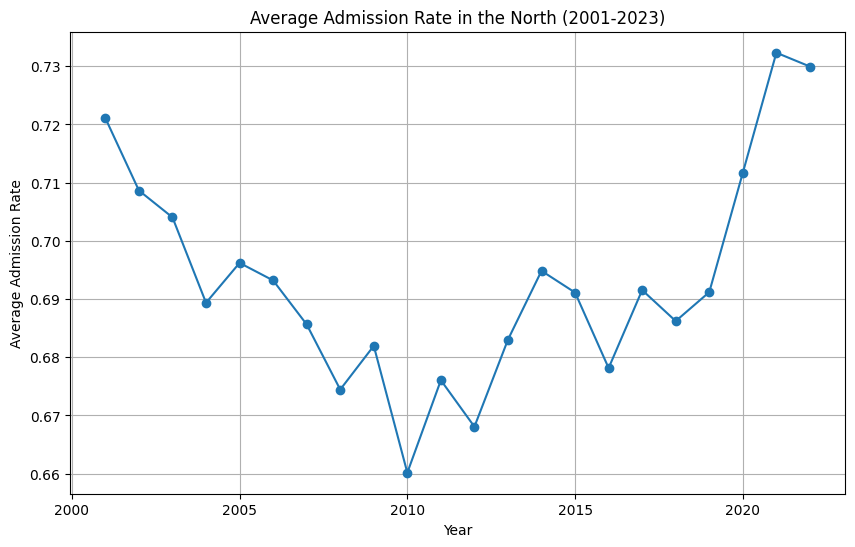

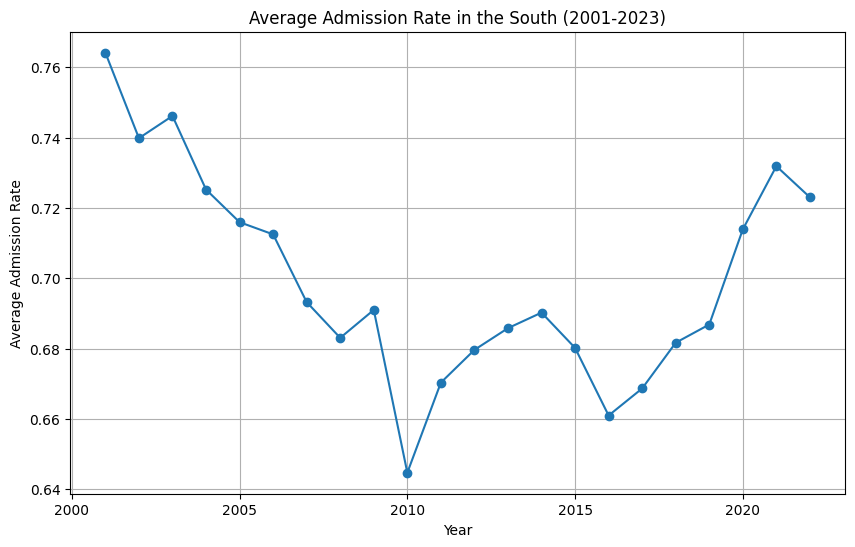

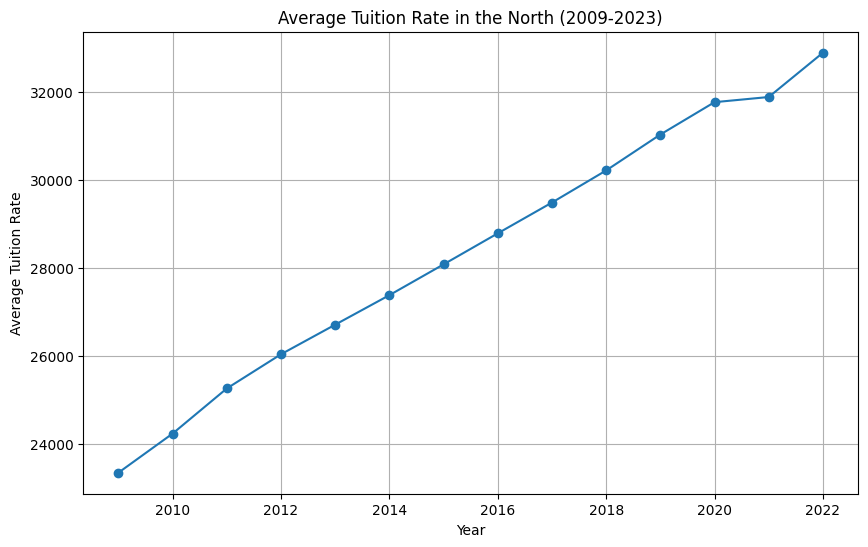

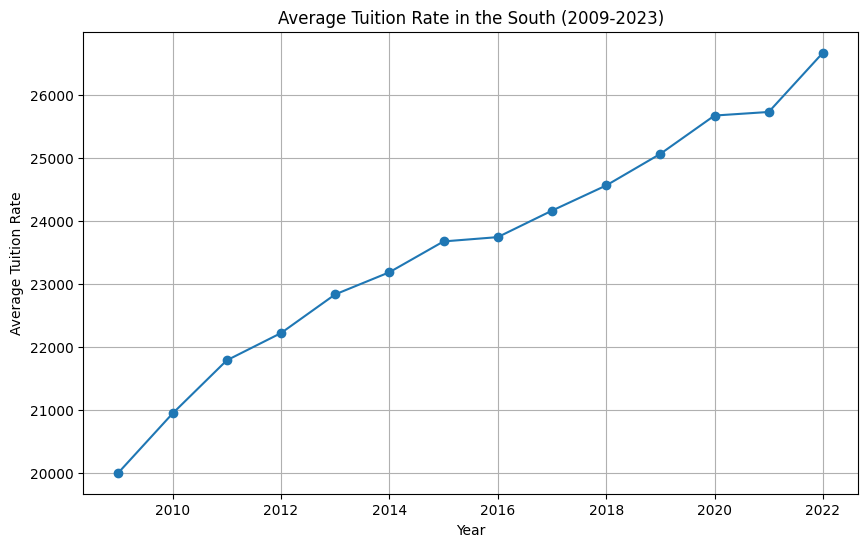

In [41]:
# The visual trends of the Admissions and Tuition Data for the North and South

# Plot the data to visualize trends
plt.figure(figsize=(10,6))
plt.plot(data_north_admissions['Year'], data_north_admissions['Average_Admission_Rate_North'], marker='o', linestyle='-')
plt.title('Average Admission Rate in the North (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Average Admission Rate')
plt.grid(True)
plt.show()

# Plot the data to visualize trends
plt.figure(figsize=(10,6))
plt.plot(data_south_admissions['Year'], data_south_admissions['Average_Admission_Rate_South'], marker='o', linestyle='-')
plt.title('Average Admission Rate in the South (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Average Admission Rate')
plt.grid(True)
plt.show()

# Plot the data to visualize trends
plt.figure(figsize=(10,6))
plt.plot(data_north_tuition['Year'], data_north_tuition['Average_Tuition_North'], marker='o', linestyle='-')
plt.title('Average Tuition Rate in the North (2009-2023)')
plt.xlabel('Year')
plt.ylabel('Average Tuition Rate')
plt.grid(True)
plt.show()

# Plot the data to visualize trends
plt.figure(figsize=(10,6))
plt.plot(data_south_tuition['Year'], data_south_tuition['Average_Tuition_South'], marker='o', linestyle='-')
plt.title('Average Tuition Rate in the South (2009-2023)')
plt.xlabel('Year')
plt.ylabel('Average Tuition Rate')
plt.grid(True)
plt.show()

In [42]:
# Apply first-order differencing
data_north_admissions['Differenced_Rate'] = data_north_admissions['Average_Admission_Rate_North'].diff()

data_south_admissions['Differenced_Rate'] = data_south_admissions['Average_Admission_Rate_South'].diff()

data_north_tuition['Differenced_Rate'] = data_north_tuition['Average_Tuition_North'].diff()

data_south_tuition['Differenced_Rate'] = data_south_tuition['Average_Tuition_South'].diff()

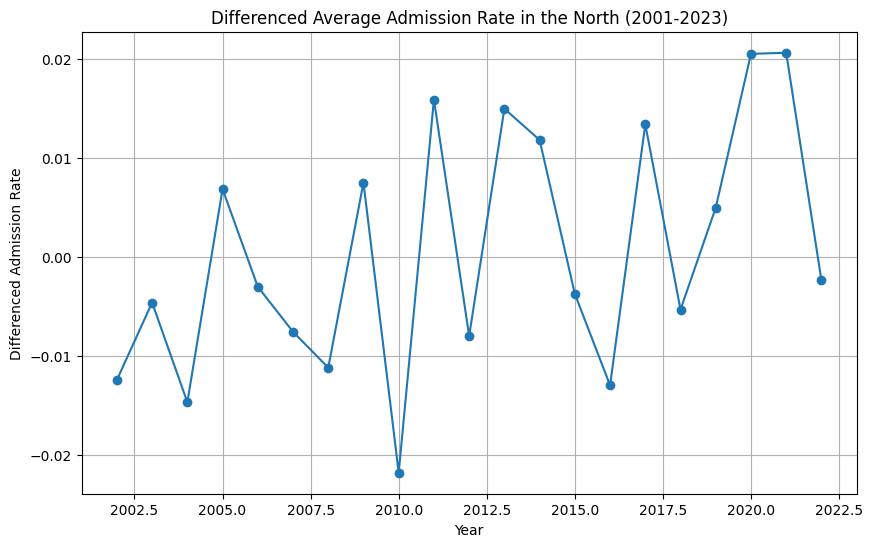

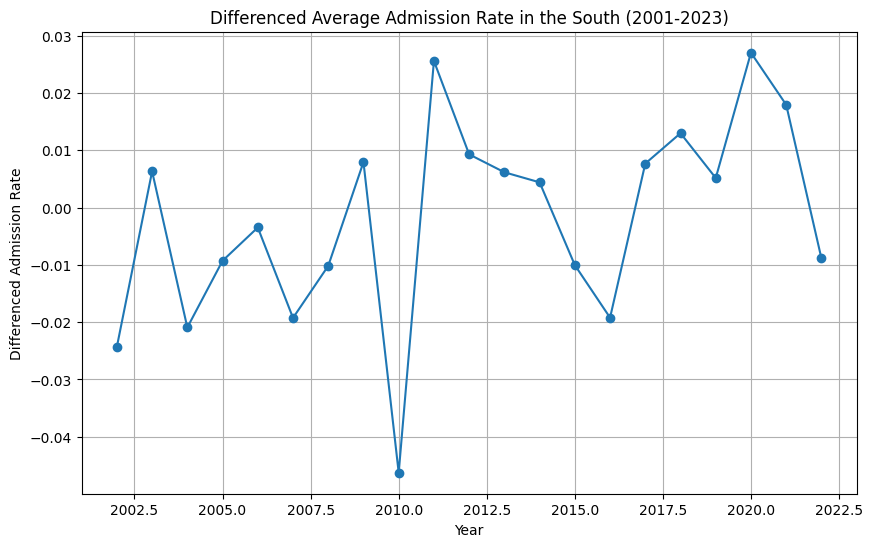

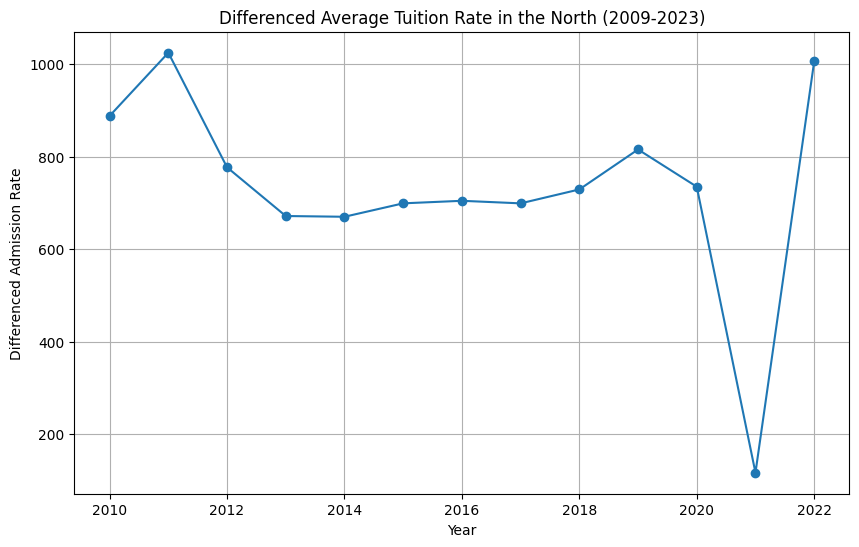

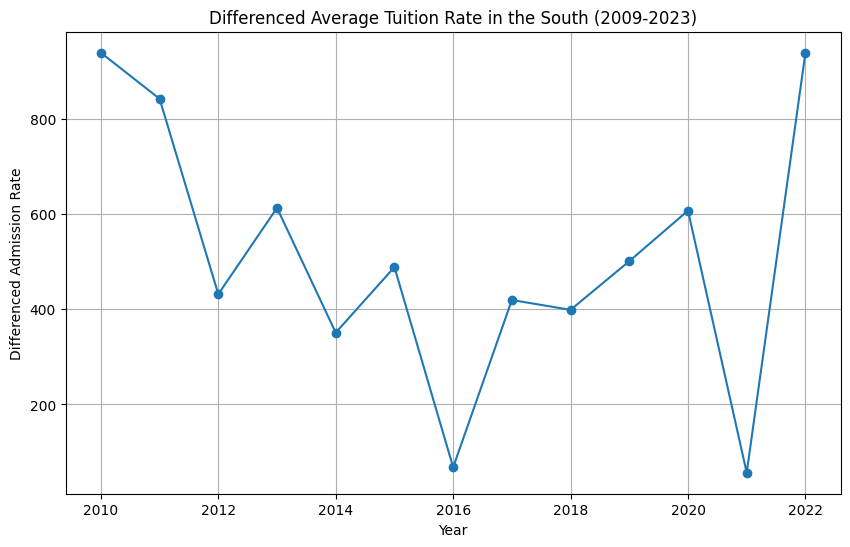

In [43]:
# Plot the differenced series
plt.figure(figsize=(10,6))
plt.plot(data_north_admissions['Year'], data_north_admissions['Differenced_Rate'], marker='o', linestyle='-')
plt.title('Differenced Average Admission Rate in the North (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Differenced Admission Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(data_south_admissions['Year'], data_south_admissions['Differenced_Rate'], marker='o', linestyle='-')
plt.title('Differenced Average Admission Rate in the South (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Differenced Admission Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(data_north_tuition['Year'], data_north_tuition['Differenced_Rate'], marker='o', linestyle='-')
plt.title('Differenced Average Tuition Rate in the North (2009-2023)')
plt.xlabel('Year')
plt.ylabel('Differenced Admission Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(data_south_tuition['Year'], data_south_tuition['Differenced_Rate'], marker='o', linestyle='-')
plt.title('Differenced Average Tuition Rate in the South (2009-2023)')
plt.xlabel('Year')
plt.ylabel('Differenced Admission Rate')
plt.grid(True)
plt.show()

### ADT Test

In [44]:
# Augmented Dickey-Fuller (ADF) Test

# Null Hypothesis (H0): The time series is non-stationary (has a unit root).
# Alternative Hypothesis (H1): The time series is stationary.

# Perform the ADF test on the differenced data
result_diff_north_admissions = adfuller(data_north_admissions['Differenced_Rate'].dropna())
adf_statistic_diff_north_admissions, p_value_diff_north_admissions, critical_values_diff_north_admissions = result_diff_north_admissions[0], result_diff_north_admissions[1], result_diff_north_admissions[4]

# Print the ADF test results
print("ADF Test on Differenced Data for North Admissions:")
print(f"ADF Statistic: {adf_statistic_diff_north_admissions}")
print(f"p-value: {p_value_diff_north_admissions}")
print("Critical Values:")
for key, value in critical_values_diff_north_admissions.items():
    print(f"   {key}: {value}")

# Conclusion: If the p-value < 0.05, reject the null hypothesis (the series is stationary). Otherwise, the series is non-stationary.
if p_value_diff_north_admissions < 0.05:
    print("Conclusion: Reject the null hypothesis (H0). The time series is stationary.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). The time series is non-stationary.")



# Perform the ADF test on the differenced data
result_diff_south_admissions = adfuller(data_south_admissions['Differenced_Rate'].dropna())
adf_statistic_diff_south_admissions, p_value_diff_south_admissions, critical_values_diff_south_admissions = result_diff_south_admissions[0], result_diff_south_admissions[1], result_diff_south_admissions[4]

# Print the ADF test results
print("ADF Test on Differenced Data for Soutth Admissions:")
print(f"ADF Statistic: {adf_statistic_diff_south_admissions}")
print(f"p-value: {p_value_diff_south_admissions}")
print("Critical Values:")
for key, value in critical_values_diff_south_admissions.items():
    print(f"   {key}: {value}")

# Conclusion: If the p-value < 0.05, reject the null hypothesis (the series is stationary). Otherwise, the series is non-stationary.
if p_value_diff_south_admissions < 0.05:
    print("Conclusion: Reject the null hypothesis (H0). The time series is stationary.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). The time series is non-stationary.")


# Perform the ADF test on the differenced data
result_diff_north_tuition = adfuller(data_north_tuition['Differenced_Rate'].dropna())
adf_statistic_diff_north_tuition, p_value_diff_north_tuition, critical_values_diff_north_tuition = result_diff_north_tuition[0], result_diff_north_tuition[1], result_diff_north_tuition[4]

# Print the ADF test results
print("ADF Test on Differenced Data for North Tuition:")
print(f"ADF Statistic: {adf_statistic_diff_north_tuition}")
print(f"p-value: {p_value_diff_north_tuition}")
print("Critical Values:")
for key, value in critical_values_diff_north_tuition.items():
    print(f"   {key}: {value}")

# Conclusion: If the p-value < 0.05, reject the null hypothesis (the series is stationary). Otherwise, the series is non-stationary.
if p_value_diff_north_tuition < 0.05:
    print("Conclusion: Reject the null hypothesis (H0). The time series is stationary.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). The time series is non-stationary.")


# Perform the ADF test on the differenced data
result_diff_south_tuition = adfuller(data_south_tuition['Differenced_Rate'].dropna())
adf_statistic_diff_south_tuition, p_value_diff_south_tuition, critical_values_diff_south_tuition = result_diff_south_tuition[0], result_diff_south_tuition[1], result_diff_south_tuition[4]

# Print the ADF test results
print("ADF Test on Differenced Data for South Tuition:")
print(f"ADF Statistic: {adf_statistic_diff_south_tuition}")
print(f"p-value: {p_value_diff_south_tuition}")
print("Critical Values:")
for key, value in critical_values_diff_south_tuition.items():
    print(f"   {key}: {value}")

# Conclusion: If the p-value < 0.05, reject the null hypothesis (the series is stationary). Otherwise, the series is non-stationary.
if p_value_diff_south_tuition < 0.05:
    print("Conclusion: Reject the null hypothesis (H0). The time series is stationary.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H0). The time series is non-stationary.")

ADF Test on Differenced Data for North Admissions:
ADF Statistic: -1.0844648531053356
p-value: 0.7212272151437343
Critical Values:
   1%: -4.137829282407408
   5%: -3.1549724074074077
   10%: -2.7144769444444443
Conclusion: Fail to reject the null hypothesis (H0). The time series is non-stationary.
ADF Test on Differenced Data for Soutth Admissions:
ADF Statistic: -1.690785922221315
p-value: 0.43586599055078235
Critical Values:
   1%: -4.137829282407408
   5%: -3.1549724074074077
   10%: -2.7144769444444443
Conclusion: Fail to reject the null hypothesis (H0). The time series is non-stationary.
ADF Test on Differenced Data for North Tuition:
ADF Statistic: -5.627717528215998
p-value: 1.1075393531037038e-06
Critical Values:
   1%: -4.473135048010974
   5%: -3.28988060356653
   10%: -2.7723823456790124
Conclusion: Reject the null hypothesis (H0). The time series is stationary.
ADF Test on Differenced Data for South Tuition:
ADF Statistic: -3.599366966824596
p-value: 0.005773141525677505
C

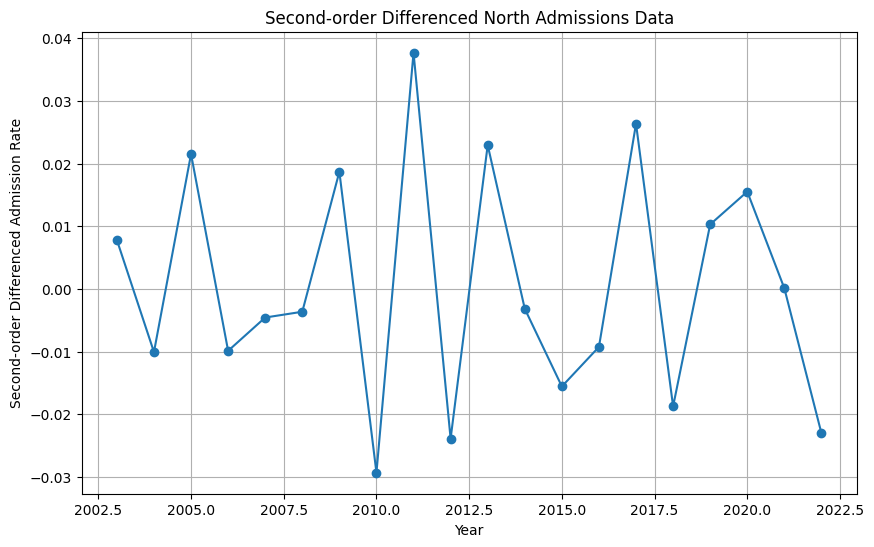

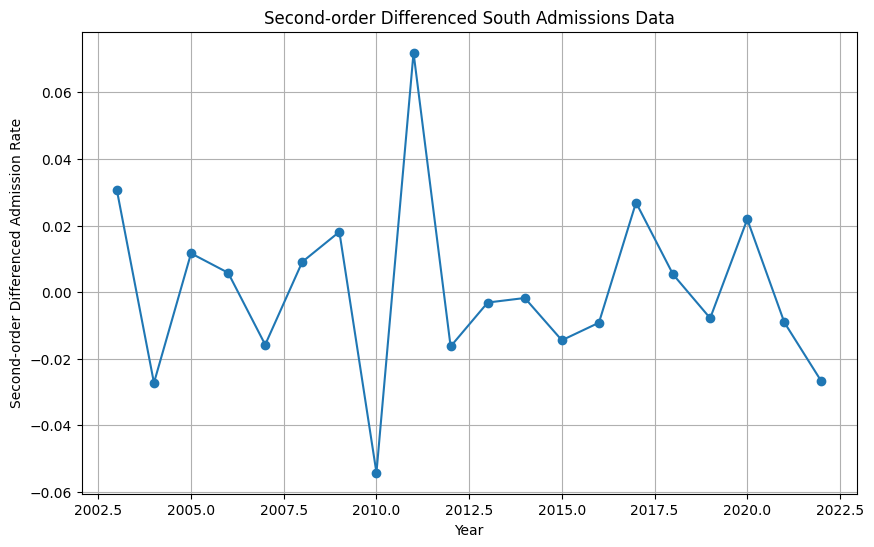

ADF Test on Second-order Differenced North Admissions:
ADF Statistic: -1.2753337467754282
p-value: 0.6403802596363339
Critical Values:
   1%: -4.223238279489106
   5%: -3.189368925619835
   10%: -2.729839421487603
Conclusion: Fail to reject the null hypothesis (H0). The Second-order Differenced North Admissions series is still non-stationary.

ADF Test on Second-order Differenced South Admissions:
ADF Statistic: -1.6367730340726114
p-value: 0.46394746909470524
Critical Values:
   1%: -4.223238279489106
   5%: -3.189368925619835
   10%: -2.729839421487603
Conclusion: Fail to reject the null hypothesis (H0). The Second-order Differenced South Admissions series is still non-stationary.



In [45]:
# Load the North and South admissions data
north_admission_data = pd.read_csv('north_average_admission_rate_by_year.csv')
south_admission_data = pd.read_csv('south_average_admission_rate_by_year.csv')

# Apply second-order differencing
north_admission_data['Second_Differenced_Rate_North'] = north_admission_data['Average_Admission_Rate_North'].diff().diff()
south_admission_data['Second_Differenced_Rate_South'] = south_admission_data['Average_Admission_Rate_South'].diff().diff()

# Plot the second-order differenced data
plt.figure(figsize=(10,6))
plt.plot(north_admission_data['Year'], north_admission_data['Second_Differenced_Rate_North'], marker='o', linestyle='-')
plt.title('Second-order Differenced North Admissions Data')
plt.xlabel('Year')
plt.ylabel('Second-order Differenced Admission Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(south_admission_data['Year'], south_admission_data['Second_Differenced_Rate_South'], marker='o', linestyle='-')
plt.title('Second-order Differenced South Admissions Data')
plt.xlabel('Year')
plt.ylabel('Second-order Differenced Admission Rate')
plt.grid(True)
plt.show()

# Perform ADF test on second-order differenced data
def adf_test(series, title):
    result = adfuller(series.dropna())
    print(f'ADF Test on {title}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] < 0.05:
        print(f'Conclusion: Reject the null hypothesis (H0). The {title} series is stationary.\n')
    else:
        print(f'Conclusion: Fail to reject the null hypothesis (H0). The {title} series is still non-stationary.\n')

# ADF test for second-order differenced data
adf_test(north_admission_data['Second_Differenced_Rate_North'], 'Second-order Differenced North Admissions')
adf_test(south_admission_data['Second_Differenced_Rate_South'], 'Second-order Differenced South Admissions')


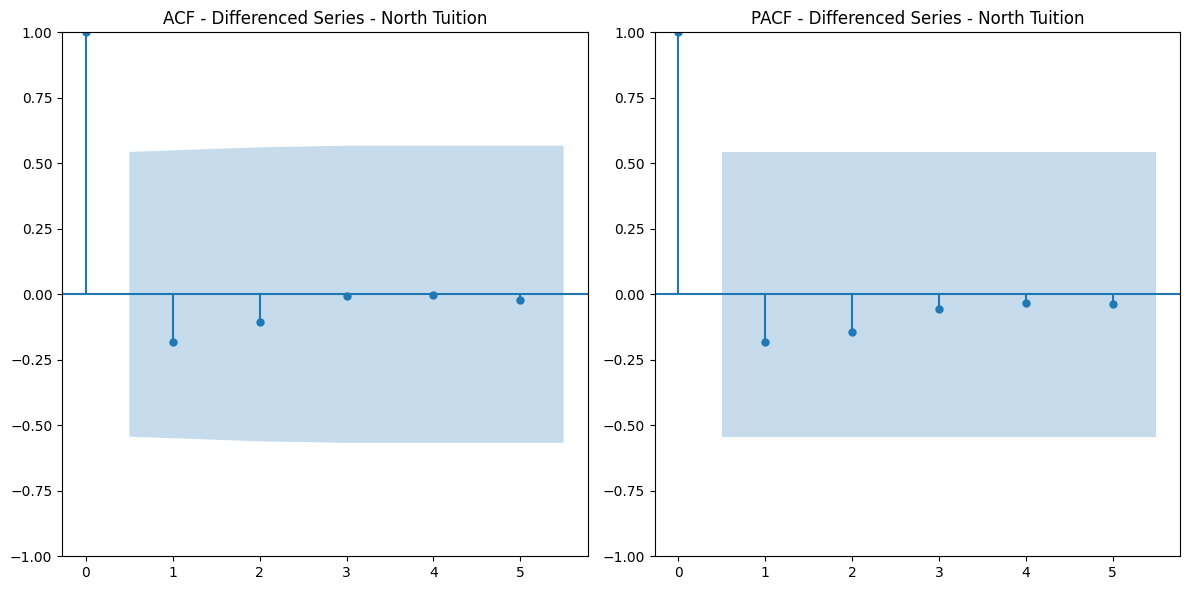

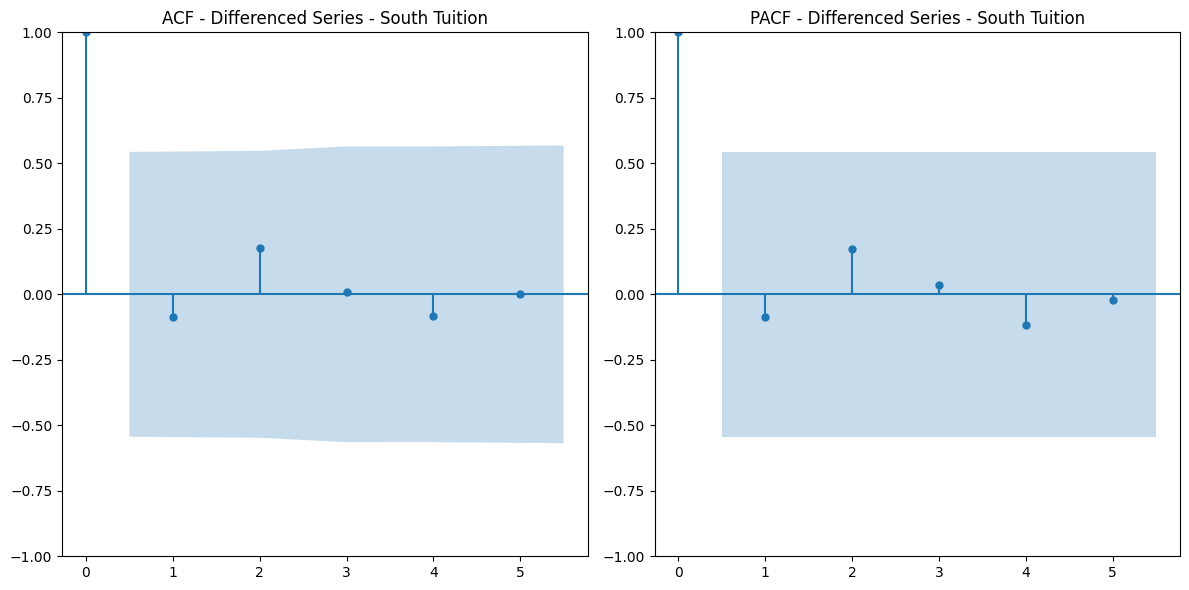

In [47]:
# Plot ACF and PACF for the differenced data for Tuition Data
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(data_north_tuition['Differenced_Rate'].dropna(), ax=plt.gca(), lags=5)
plt.title('ACF - Differenced Series - North Tuition')
plt.subplot(122)
plot_pacf(data_north_tuition['Differenced_Rate'].dropna(), ax=plt.gca(), lags=5)
plt.title('PACF - Differenced Series - North Tuition')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(data_south_tuition['Differenced_Rate'].dropna(), ax=plt.gca(), lags=5)
plt.title('ACF - Differenced Series - South Tuition')
plt.subplot(122)
plot_pacf(data_south_tuition['Differenced_Rate'].dropna(), ax=plt.gca(), lags=5)
plt.title('PACF - Differenced Series - South Tuition')
plt.tight_layout()
plt.show()

In [48]:
# Define the ARIMA model (ARIMA(1,1,1))
model_north_tuition = ARIMA(data_north_tuition['Average_Tuition_North'], order=(1, 1, 1))

# Fit the model
model_north_tuition_fit = model_north_tuition.fit()

# Summary of the model
print(model_north_tuition_fit.summary())


# Define the ARIMA model (ARIMA(1,1,1))
model_south_tuition = ARIMA(data_south_tuition['Average_Tuition_South'], order=(1, 1, 1))

# Fit the model
model_south_tuition_fit = model_south_tuition.fit()

# Summary of the model
print(model_south_tuition_fit.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Average_Tuition_North   No. Observations:                   14
Model:                    ARIMA(1, 1, 1)   Log Likelihood                 -88.808
Date:                   Wed, 30 Oct 2024   AIC                            183.615
Time:                           11:17:17   BIC                            185.310
Sample:                                0   HQIC                           183.267
                                    - 14                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9816      0.018     53.244      0.000       0.945       1.018
ma.L1         -0.8349      0.108     -7.748      0.000      -1.046      -0.624
sigma2      5.112e+04   1.56

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


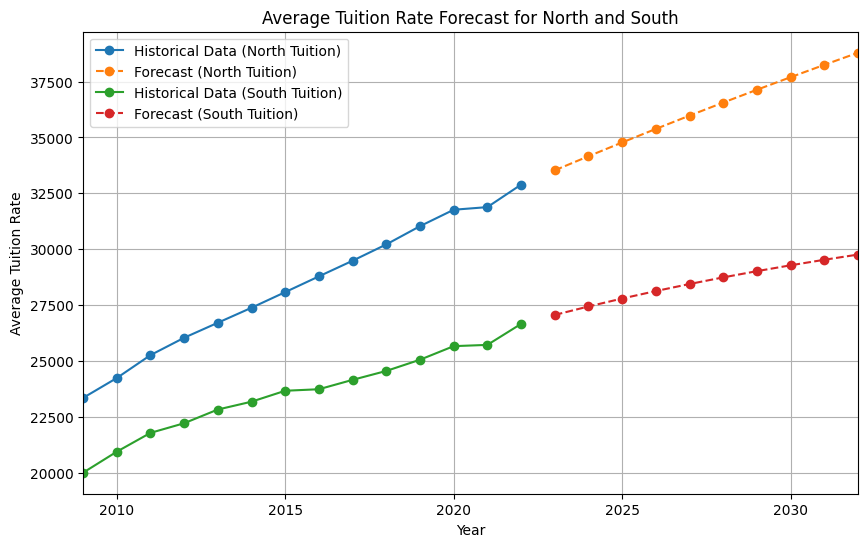

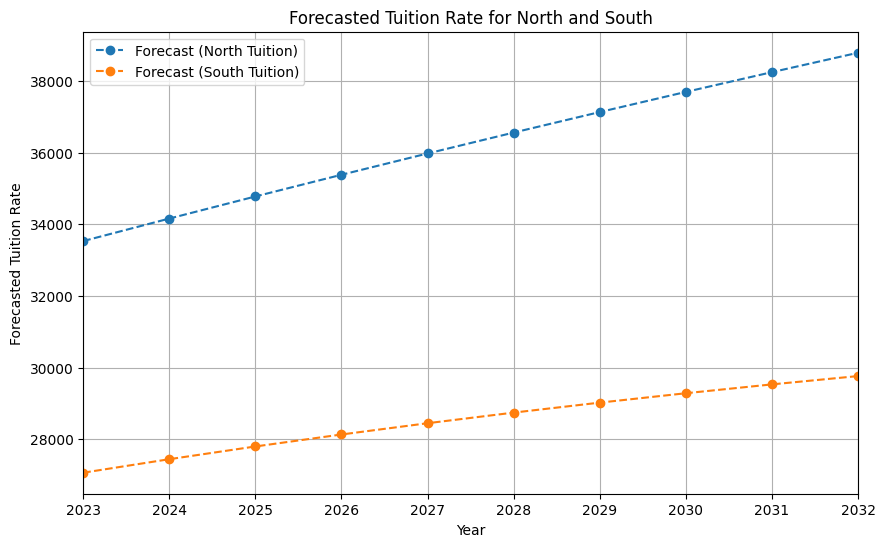

In [57]:
# Forecast the next 10 years (2023-2032) for North Tuition, using 2022 as the last known data point
forecast_steps_north_tuition = 10
start_year_north_tuition = len(data_north_tuition)
end_year_north_tuition = start_year_north_tuition + forecast_steps_north_tuition - 1

# Predict future values using the ARIMA model, starting at 2023
forecast_north_tuition = model_north_tuition_fit.predict(start=start_year_north_tuition, end=end_year_north_tuition)

# Create the correct time index for the forecast (2023-2032)
forecast_years_north_tuition = pd.Series(range(2023, 2023 + forecast_steps_north_tuition))
forecast_series_north_tuition = pd.Series(forecast_north_tuition.values, index=forecast_years_north_tuition)

# Forecast the next 10 years (2023-2032) for South Tuition, using 2022 as the last known data point
forecast_steps_south_tuition = 10
start_year_south_tuition = len(data_south_tuition)
end_year_south_tuition = start_year_south_tuition + forecast_steps_south_tuition - 1

# Predict future values using the ARIMA model, starting at 2023
forecast_south_tuition = model_south_tuition_fit.predict(start=start_year_south_tuition, end=end_year_south_tuition)

# Create the correct time index for the forecast (2023-2032)
forecast_years_south_tuition = pd.Series(range(2023, 2023 + forecast_steps_south_tuition))
forecast_series_south_tuition = pd.Series(forecast_south_tuition.values, index=forecast_years_south_tuition)

# Plot both historical and forecast data
plt.figure(figsize=(10,6))

# Plot Historical Data for North Tuition
plt.plot(data_north_tuition['Year'], data_north_tuition['Average_Tuition_North'], label='Historical Data (North Tuition)', marker='o')

# Plot Forecast Data for North Tuition
plt.plot(forecast_series_north_tuition.index, forecast_series_north_tuition, label='Forecast (North Tuition)', marker='o', linestyle='--')

# Plot Historical Data for South Tuition
plt.plot(data_south_tuition['Year'], data_south_tuition['Average_Tuition_South'], label='Historical Data (South Tuition)', marker='o')

# Plot Forecast Data for South Tuition
plt.plot(forecast_series_south_tuition.index, forecast_series_south_tuition, label='Forecast (South Tuition)', marker='o', linestyle='--')

# Adjust the x-axis to cover both historical and forecasted periods
plt.xlim([data_north_tuition['Year'].min(), 2032])

# Adding titles and labels
plt.title('Average Tuition Rate Forecast for North and South')
plt.xlabel('Year')
plt.ylabel('Average Tuition Rate')
plt.legend()
plt.grid(True)
plt.show()

# Now, plot only the forecasted data for both North and South
plt.figure(figsize=(10,6))

# Plot Forecast Data for North Tuition
plt.plot(forecast_series_north_tuition.index, forecast_series_north_tuition, label='Forecast (North Tuition)', marker='o', linestyle='--')

# Plot Forecast Data for South Tuition
plt.plot(forecast_series_south_tuition.index, forecast_series_south_tuition, label='Forecast (South Tuition)', marker='o', linestyle='--')

# Adjust the x-axis to cover only the forecast period
plt.xlim([2023, 2032])

# Adding titles and labels for forecast-only plot
plt.title('Forecasted Tuition Rate for North and South')
plt.xlabel('Year')
plt.ylabel('Forecasted Tuition Rate')
plt.legend()
plt.grid(True)
plt.show()


### ETS Analysis

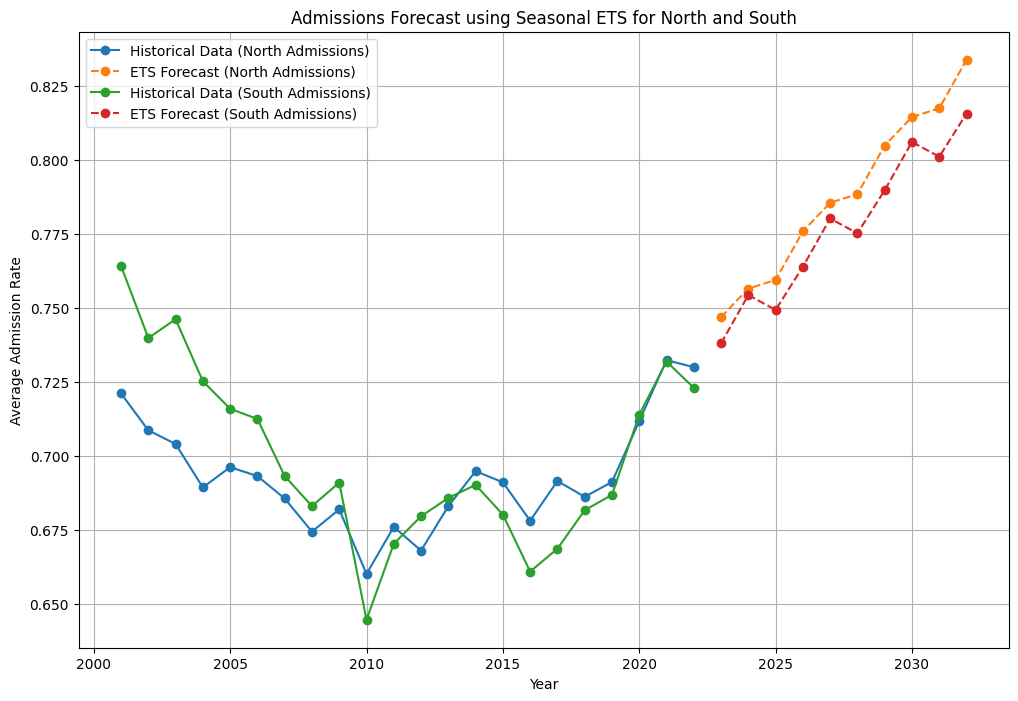

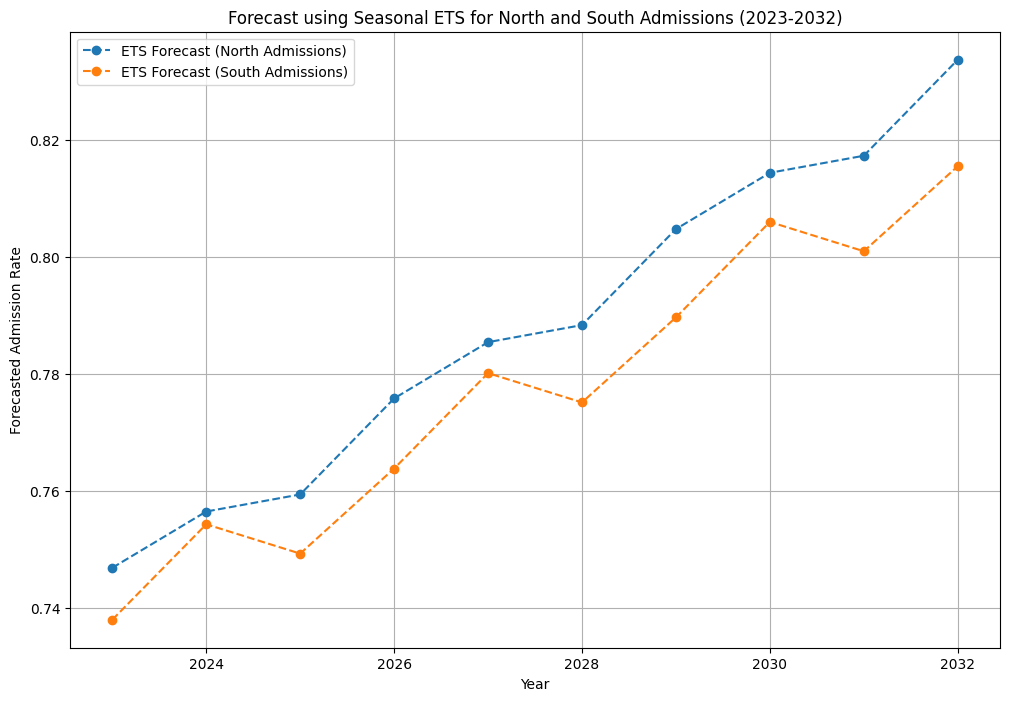

In [55]:
# Fit Seasonal ETS model for North Admissions
model_north_ets = ExponentialSmoothing(data_north_admissions['Average_Admission_Rate_North'],
                                       trend='add', seasonal='add', seasonal_periods=3).fit()

# Forecast for the next 10 years (2023-2032) with ETS for North
forecast_north_ets = model_north_ets.forecast(steps=10)

# Fit Seasonal ETS model for South Admissions
model_south_ets = ExponentialSmoothing(data_south_admissions['Average_Admission_Rate_South'],
                                       trend='add', seasonal='add', seasonal_periods=3).fit()

# Forecast for the next 10 years (2023-2032) with ETS for South
forecast_south_ets = model_south_ets.forecast(steps=10)

# Create future time index for forecasts
forecast_years = pd.Series(range(2023, 2023 + 10))

# Plot historical and forecast data for North and South Admissions
plt.figure(figsize=(12,8))

# Plot Historical Data for North Admissions
plt.plot(data_north_admissions['Year'], data_north_admissions['Average_Admission_Rate_North'], label='Historical Data (North Admissions)', marker='o')

# Plot ETS Forecast for North Admissions
plt.plot(forecast_years, forecast_north_ets, label='ETS Forecast (North Admissions)', marker='o', linestyle='--')

# Plot Historical Data for South Admissions
plt.plot(data_south_admissions['Year'], data_south_admissions['Average_Admission_Rate_South'], label='Historical Data (South Admissions)', marker='o')

# Plot ETS Forecast for South Admissions
plt.plot(forecast_years, forecast_south_ets, label='ETS Forecast (South Admissions)', marker='o', linestyle='--')

# Forcast plot with previous data
plt.title('Admissions Forecast using Seasonal ETS for North and South')
plt.xlabel('Year')
plt.ylabel('Average Admission Rate')
plt.legend()
plt.grid(True)
plt.show()

# Separate plot for forecast only
plt.figure(figsize=(12,8))

# Plot ETS Forecast for North Admissions (2023-2032)
plt.plot(forecast_years, forecast_north_ets, label='ETS Forecast (North Admissions)', marker='o', linestyle='--')

# Plot ETS Forecast for South Admissions (2023-2032)
plt.plot(forecast_years, forecast_south_ets, label='ETS Forecast (South Admissions)', marker='o', linestyle='--')

# Customize plot
plt.title('Forecast using Seasonal ETS for North and South Admissions (2023-2032)')
plt.xlabel('Year')
plt.ylabel('Forecasted Admission Rate')
plt.legend()
plt.grid(True)
plt.show()


### Paired T-Test

In [56]:
# Paired T-Test for North vs. South Admissions Data
t_stat_admissions, p_value_admissions = ttest_rel(data_north_admissions['Average_Admission_Rate_North'],
                                                  data_south_admissions['Average_Admission_Rate_South'])

# Print the t-statistic and p-value
print(f"Paired T-Test for Admissions: t-statistic = {t_stat_admissions}, p-value = {p_value_admissions}")

# Interpretation for Admissions
if p_value_admissions < 0.05:
    print("Interpretation: There is a statistically significant difference in admissions between North and South regions.")
else:
    print("Interpretation: There is no statistically significant difference in admissions between North and South regions.")

# Paired T-Test for North vs. South Tuition Data
t_stat_tuition, p_value_tuition = ttest_rel(data_north_tuition['Average_Tuition_North'],
                                            data_south_tuition['Average_Tuition_South'])

# Print the t-statistic and p-value
print(f"Paired T-Test for Tuition: t-statistic = {t_stat_tuition}, p-value = {p_value_tuition}")

# Interpretation for Tuition
if p_value_tuition < 0.05:
    print("Interpretation: There is a statistically significant difference in tuition between North and South regions.")
else:
    print("Interpretation: There is no statistically significant difference in tuition between North and South regions.")


Paired T-Test for Admissions: t-statistic = -1.5864400702919896, p-value = 0.12758346318268846
Interpretation: There is no statistically significant difference in admissions between North and South regions.
Paired T-Test for Tuition: t-statistic = 15.889461807996609, p-value = 6.769017837715193e-10
Interpretation: There is a statistically significant difference in tuition between North and South regions.
